In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Chargement du fichier parquet avec les mensualités corrigées
input_path = "../../data/cleaning/step2_with_monthly_payment_corrected.parquet"
df = pd.read_parquet(input_path)

# Création d'une nouvelle colonne : revenu mensuel estimé
df['monthly_income_estimated'] = df['annual_inc'] / 12

# Comparaison entre mensualité et revenu mensuel
df['installment_vs_income_ratio'] = df['monthly_payment_calculated'] / df['monthly_income_estimated']

# Filtrage des cas incohérents (par exemple > 1 = mensualité supérieure au revenu mensuel)
df_incoherent = df[df['installment_vs_income_ratio'] > 0.3]

# Statistiques globales
print("Nombre total de prêts :", len(df))
print("Nombre de cas incohérents :", len(df_incoherent))
print("Ratio maximum :", df['installment_vs_income_ratio'].max())
print("Ratio moyen :", df['installment_vs_income_ratio'].mean())

# Aperçu des cas incohérents
df_incoherent_sample = df_incoherent[['loan_amnt', 'annual_inc', 'monthly_payment_calculated', 'monthly_income_estimated', 'installment_vs_income_ratio']].head(10)
print("\nExemples de cas incohérents :")
print(df_incoherent_sample)


Nombre total de prêts : 396030
Nombre de cas incohérents : 30
Ratio maximum : inf
Ratio moyen : inf

Exemples de cas incohérents :
        loan_amnt  annual_inc  monthly_payment_calculated  \
4413       240000      270000                 8256.353443   
7011       183750       25000                 5527.699279   
9124        62750       85500                 2264.158266   
30748      180000      168000                 6307.845678   
36015      151000       80000                 3189.760792   
52235       90000      110000                 2893.494691   
78932      350000      350000                12628.771203   
98179      196000      200000                 5322.323704   
108842     100000      105600                 3262.045325   
127178     166000      200000                 5337.667911   

        monthly_income_estimated  installment_vs_income_ratio  
4413                22500.000000                     0.366949  
7011                 2083.333333                     2.653296  
9124 

C:\Users\Pierre\AppData\Local\Temp\ipykernel_22596\3623611969.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=debt_band_counts.index, y=debt_band_counts.values, palette="crest")


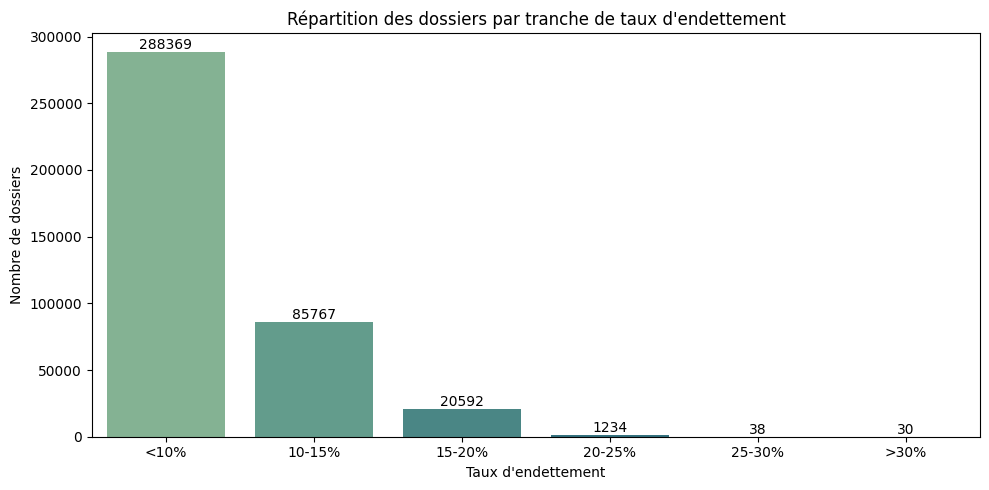

In [4]:
# Créer les tranches de taux d’endettement
bins = [0, 0.1, 0.15, 0.20, 0.25, 0.30, df['installment_vs_income_ratio'].max()]
labels = ['<10%', '10-15%', '15-20%', '20-25%', '25-30%', '>30%']
df['debt_ratio_band'] = pd.cut(df['installment_vs_income_ratio'], bins=bins, labels=labels, include_lowest=True)

# Compter les dossiers par tranche
debt_band_counts = df['debt_ratio_band'].value_counts().sort_index()

# Visualisation
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=debt_band_counts.index, y=debt_band_counts.values, palette="crest")
for i, v in enumerate(debt_band_counts.values):
    ax.text(i, v + 100, str(v), ha='center', va='bottom', fontsize=10)
plt.title("Répartition des dossiers par tranche de taux d'endettement")
plt.xlabel("Taux d'endettement")
plt.ylabel("Nombre de dossiers")
plt.tight_layout()
plt.show()

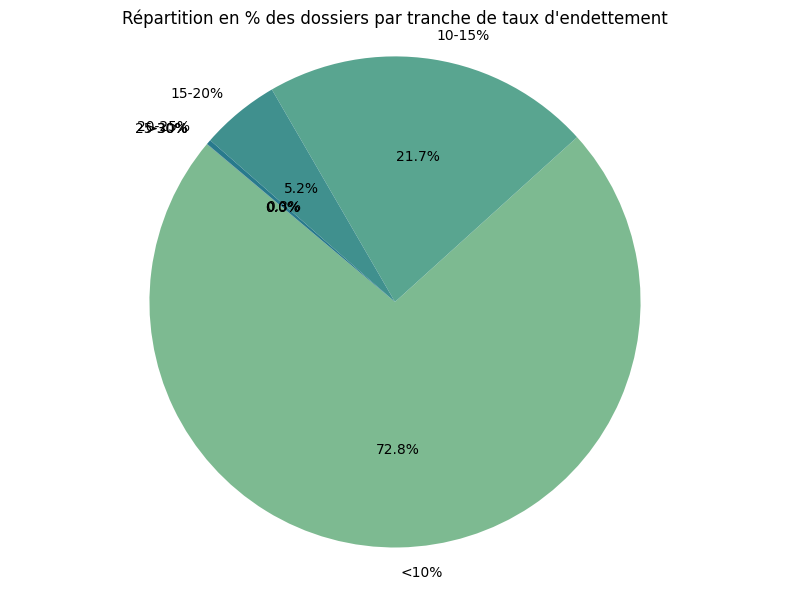

In [5]:
# Pourcentage du total
debt_band_percent = (debt_band_counts / debt_band_counts.sum()) * 100

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(debt_band_percent, labels=debt_band_percent.index, autopct='%.1f%%', startangle=140, colors=sns.color_palette("crest", len(labels)))
plt.title("Répartition en % des dossiers par tranche de taux d'endettement")
plt.axis('equal')
plt.tight_layout()
plt.show()